In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Iris.csv")
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Data Visualize

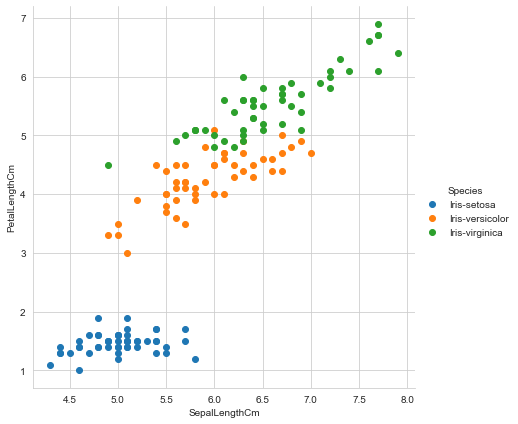

In [3]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue ="Species", height=6).map(plt.scatter,'SepalLengthCm','PetalLengthCm').add_legend()

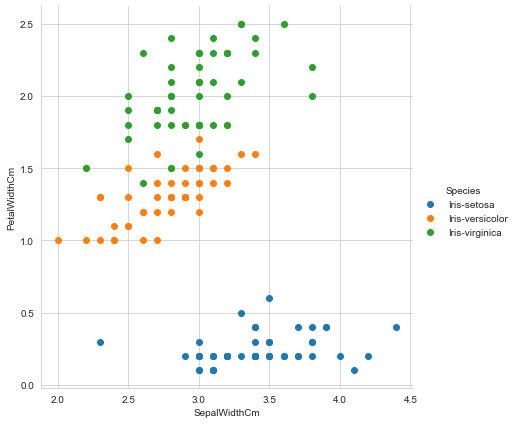

In [4]:
sns.FacetGrid(data, hue ="Species", height=6).map(plt.scatter,'SepalWidthCm','PetalWidthCm').add_legend()

### Data preparation

In [5]:
x=data.drop("Species",axis=1)
y=data["Species"]

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

### Model Training and Selection

In [7]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

#### First using Entropy

In [8]:
clf=DecisionTreeClassifier(criterion="entropy", max_depth=5)

In [9]:
clf.fit(x_train.drop("Id",axis=1),y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [10]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [11]:
predictions=clf.predict(x_test.drop("Id",axis=1))

In [12]:
predictions

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [13]:
clf.score(x_test.drop("Id",axis=1),y_test)

1.0

In [14]:
def accurate(y_test,prediction):
    return np.sum(np.array(y_test)==np.array(prediction))/len(y_test)

In [26]:
print(accurate(y_test,predictions))

1.0


[Text(103.01538461538462, 199.32, 'X[2] <= 2.45\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(77.26153846153846, 163.07999999999998, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(128.76923076923077, 163.07999999999998, 'X[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(51.50769230769231, 126.83999999999999, 'X[3] <= 1.65\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(25.753846153846155, 90.6, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(77.26153846153846, 90.6, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(206.03076923076924, 126.83999999999999, 'X[3] <= 1.75\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(128.76923076923077, 90.6, 'X[2] <= 4.95\nentropy = 1.0\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(103.01538461538462, 54.359999999999985, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(154.52307692307693, 54.359999999999985, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0

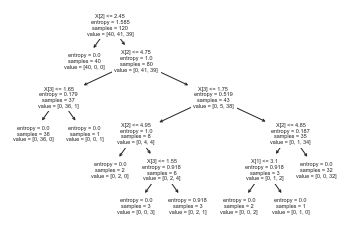

In [16]:
plot_tree(clf)

### Second With Gini

In [17]:
sec_clf=DecisionTreeClassifier(criterion="gini", max_depth=5)

In [18]:
sec_clf.fit(x_train.drop("Id",axis=1),y_train)

DecisionTreeClassifier(max_depth=5)

In [19]:
sec_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [20]:
sec_pre=sec_clf.predict(x_test.drop("Id",axis=1))

In [21]:
sec_pre

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [23]:
sec_clf.score(x_test.drop("Id",axis=1),y_test)

1.0

In [24]:
print(accurate(y_test,sec_pre))

1.0


[Text(103.01538461538462, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(77.26153846153846, 163.07999999999998, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(128.76923076923077, 163.07999999999998, 'X[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(51.50769230769231, 126.83999999999999, 'X[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(25.753846153846155, 90.6, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(77.26153846153846, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(206.03076923076924, 126.83999999999999, 'X[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(128.76923076923077, 90.6, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(103.01538461538462, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(154.52307692307693, 54.359999999999985, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.7692307692

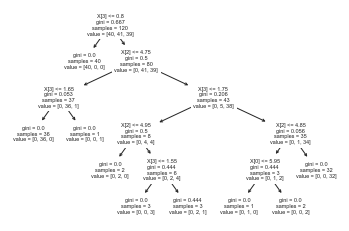

In [25]:
plot_tree(sec_clf)